In [55]:
import torch
from matplotlib import pyplot as plt
from models.cnp import CNP
from models.wta_cnp import WTA_CNP

In [61]:
root_path = "/home/yigit/projects/mbcnp/outputs/diff/"
run_id, model_folder = '1685636470', '/saved_models/'
models_path = f'{root_path}{run_id}{model_folder}'

cnp_model_path, wta_model_path = f'{models_path}cnp_on_synth.pt', f'{models_path}wta_on_synth.pt'

In [62]:
batch_size = 8
cnp = CNP(input_dim=1, hidden_dim=287, output_dim=1, n_max_obs=10, n_max_tar=10, num_layers=2, batch_size=batch_size)
wta = WTA_CNP(1, 1, 10, 10, [256, 256, 256], 2, [128, 128], batch_size=batch_size)

cnp.load_state_dict(torch.load(cnp_model_path))
wta.load_state_dict(torch.load(wta_model_path))

cnp.eval()
wta.eval()

WTA_CNP(
  (encoder): Sequential(
    (0): Linear(in_features=2, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=256, bias=True)
  )
  (decoders): ModuleList(
    (0-1): 2 x Sequential(
      (0): Linear(in_features=257, out_features=128, bias=True)
      (1): ReLU()
      (2): Linear(in_features=128, out_features=2, bias=True)
    )
  )
  (gate): Sequential(
    (0): Linear(in_features=256, out_features=2, bias=True)
    (1): Softmax(dim=-1)
  )
)

In [63]:
obs = torch.Tensor([0, 0]).unsqueeze(0).unsqueeze(0)
tar = torch.linspace(0, 1, 200).unsqueeze(0).unsqueeze(-1)

# print(obs.shape, tar.shape)

with torch.no_grad():
    pred_cnp, _ = cnp(obs, tar)
    pred_wta, _ = wta(obs, tar)

print(pred_wta.shape, pred_cnp.shape)
print(pred_wta[0,0,:,0]==pred_wta[1,0,:,0])

torch.Size([2, 8, 200, 2]) torch.Size([1, 200, 2])
tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, T

<ErrorbarContainer object of 3 artists>

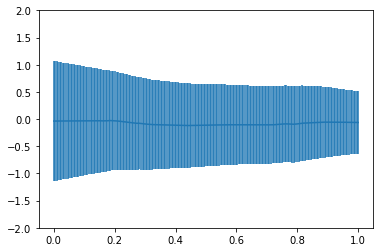

In [64]:
plt.ylim((-2, 2))

plt.errorbar(torch.linspace(0, 1, 200), pred_cnp[0,:,0], yerr=pred_cnp[0,:,1])
# plt.plot(torch.linspace(0, 1, 200), pred_wta[1,0,:,0], 'k')

<ErrorbarContainer object of 3 artists>

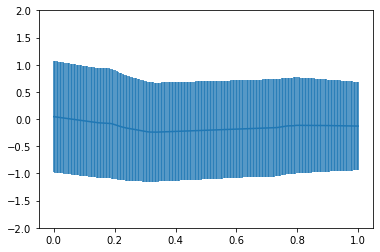

In [65]:
plt.ylim((-2, 2))
ind = 1
plt.errorbar(torch.linspace(0, 1, 200), pred_wta[ind,0,:,0], yerr=pred_wta[ind,0,:,1])